In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

In [2]:
train_csv = pd.read_csv('datasets/train.csv')
ideal_csv = pd.read_csv('datasets/ideal.csv')
test_csv = pd.read_csv('datasets/test.csv')

In [3]:
train_csv.head(10)

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076
5,-19.5,39.340855,-38.905810,-19.287113,-0.062155
6,-19.4,39.252460,-39.120360,-19.683708,0.026393
7,-19.3,38.590164,-38.621070,-19.494537,-0.269042
8,-19.2,38.893463,-38.806778,-19.533716,0.085673
9,-19.1,38.364567,-38.354656,-18.753720,-0.299542


In [4]:
ideal_csv.head(10)

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902
5,-19.5,-0.605540,0.795815,9.394460,5.795815,-9.394460,0.605540,-0.947580,-0.117020,1.591630,...,-39.302770,39.397907,2.970414,-0.008368,12.970414,5.273000,-5.273000,-0.240949,0.605540,0.714434
6,-19.4,-0.523066,0.852292,9.476934,5.852292,-9.476934,0.523066,-0.962365,-0.590048,1.704585,...,-39.061530,39.226147,2.965273,-0.008375,12.965273,5.267858,-5.267858,-0.222902,0.523066,0.752791
7,-19.3,-0.435365,0.900254,9.564634,5.900254,-9.564634,0.435365,-0.974745,0.977765,1.800508,...,-38.817684,39.050125,2.960105,-0.008382,12.960105,5.262690,-5.262690,-0.195970,0.435365,0.783485
8,-19.2,-0.343315,0.939220,9.656685,5.939220,-9.656685,0.343315,-0.984688,-0.878952,1.878441,...,-38.571660,38.869610,2.954910,-0.008389,12.954910,5.257495,-5.257495,-0.161224,0.343315,0.807098
9,-19.1,-0.247834,0.968802,9.752166,5.968802,-9.752166,0.247834,-0.992170,0.375793,1.937605,...,-38.323917,38.684402,2.949688,-0.008396,12.949688,5.252274,-5.252274,-0.120051,0.247834,0.824208


In [5]:
test_csv.head(10)

,x,y
0,17.5,34.161040
1,0.3,1.215102
2,-8.7,-16.843908
3,-19.2,-37.170870
4,-11.0,-20.263054
5,0.8,1.426456
6,14.0,-0.066506
7,-10.4,-2.007094
8,-15.0,-0.205363
9,5.8,10.711373


### Check if X columns are the same among train anf ideal csv files
If it is so, then we can work only on Y columns

In [6]:
assert sum((train_csv['x'] - ideal_csv['x']) ** 2) == 0, "X values are different!"

### Check row for duplicated values

In [7]:
assert train_csv.duplicated(subset='x').sum() == 0, "Duplicated data in train.csv"
assert ideal_csv.duplicated(subset='x').sum() == 0, "Duplicated data in ideals.csv"
assert test_csv.duplicated(subset='x').sum() == 0, "Duplicated data in test.csv"

AssertionError: Duplicated data in test.csv

# Data visualization

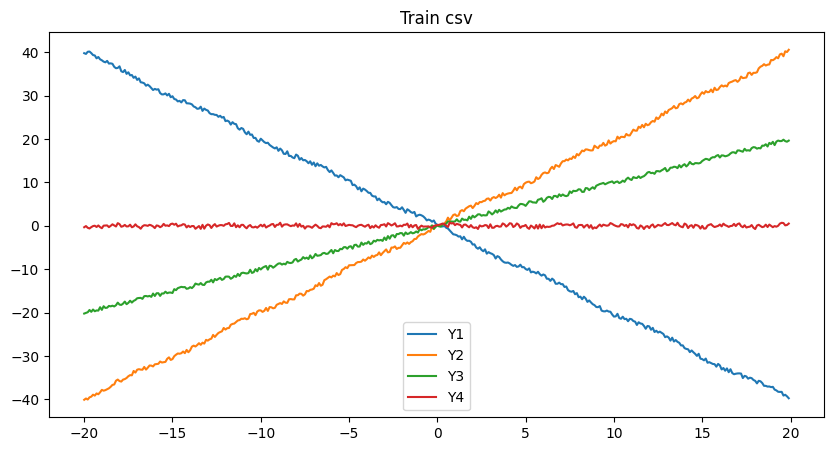

In [8]:
# plot lines 
plt.figure(figsize=[10, 5])
plt.title('Train csv')
plt.plot(train_csv['x'], train_csv['y1'], label="Y1")
plt.plot(train_csv['x'], train_csv['y2'], label="Y2")
plt.plot(train_csv['x'], train_csv['y3'], label="Y3")
plt.plot(train_csv['x'], train_csv['y4'], label="Y4")
plt.legend()
plt.show()

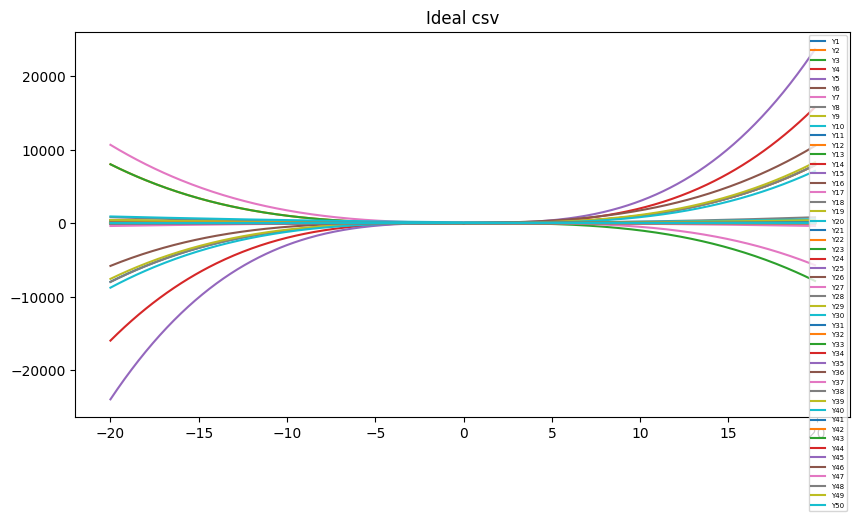

In [9]:
# plot lines 
plt.figure(figsize=[10, 5])
plt.title('Ideal csv')
ideal_y_columns = ideal_csv.columns[1:]

for col in ideal_y_columns:
    plt.plot(ideal_csv['x'], ideal_csv[col], label=col.title())

legend = plt.legend(prop={'size': 5})
plt.show()

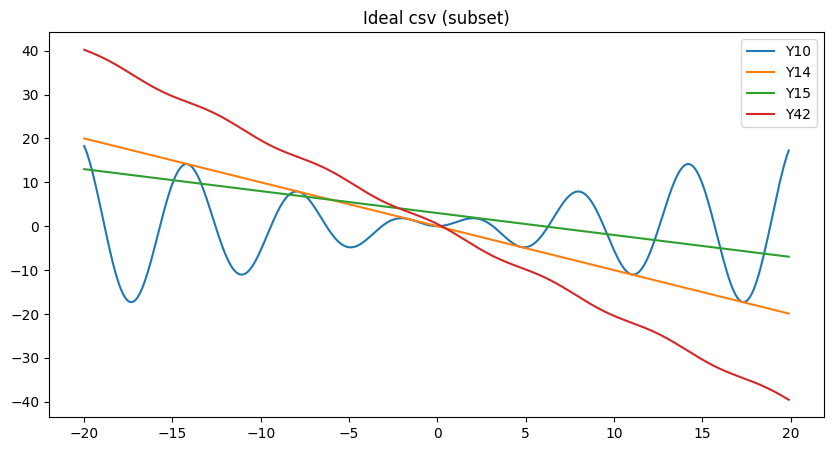

In [10]:
# plot lines 
plt.figure(figsize=[10, 5])
plt.title('Ideal csv (subset)')
ideal_y_columns = ['y10', 'y14', 'y15', 'y42']

for col in ideal_y_columns:
    plt.plot(ideal_csv['x'], ideal_csv[col], label=col.title())

legend = plt.legend(prop={'size': 10})
plt.show()

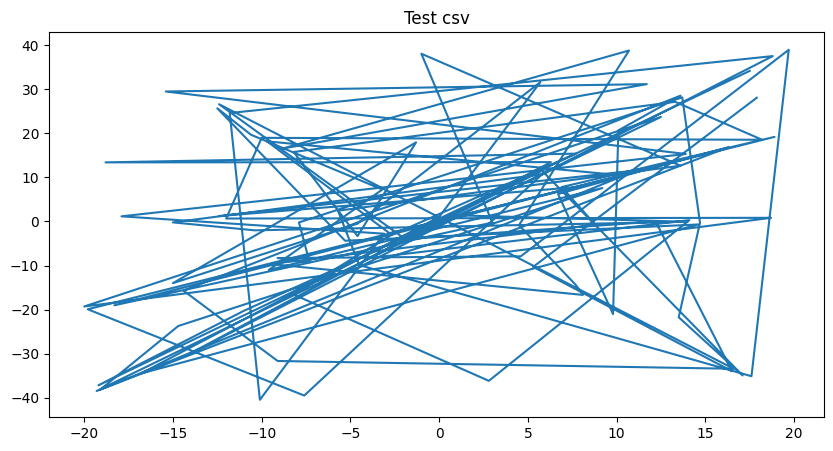

In [11]:
# plot lines 
plt.figure(figsize=[10, 5])
plt.title('Test csv')
plt.plot(test_csv['x'], test_csv['y'])
plt.show()

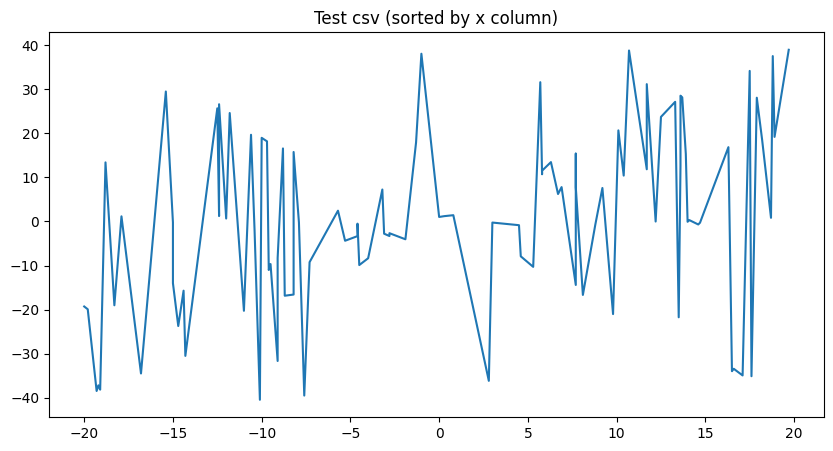

In [12]:
# plot lines 
test_csv_sorted = test_csv.sort_values(by=['x'])
plt.figure(figsize=[10, 5])
plt.title('Test csv (sorted by x column)')

plt.plot(test_csv_sorted['x'], test_csv_sorted['y'])
plt.show()

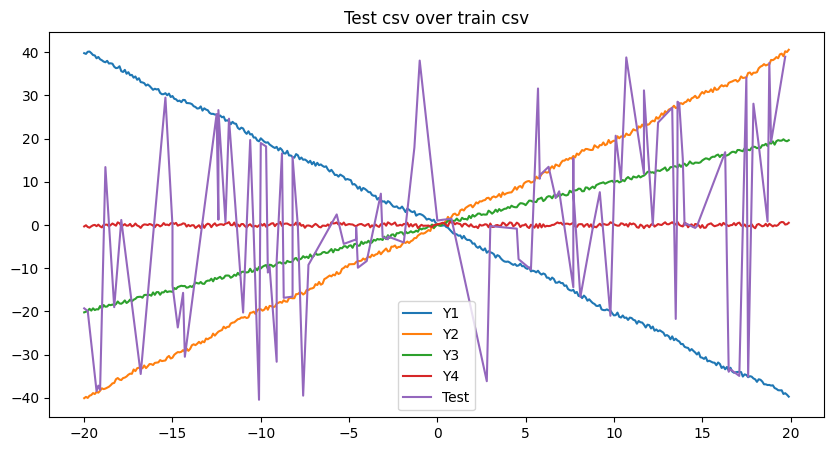

In [13]:
# plot lines 
test_csv_sorted = test_csv.sort_values(by=['x'])
plt.figure(figsize=[10, 5])
plt.title('Test csv over train csv')

# plot lines 
plt.plot(train_csv['x'], train_csv['y1'], label="Y1")
plt.plot(train_csv['x'], train_csv['y2'], label="Y2")
plt.plot(train_csv['x'], train_csv['y3'], label="Y3")
plt.plot(train_csv['x'], train_csv['y4'], label="Y4")

plt.plot(test_csv_sorted['x'], test_csv_sorted['y'], label="Test")
plt.legend()
plt.show()

## Let's now match ideals with columns from train 

In [14]:
train_columns = train_csv.columns[1:]
# ideal_columns = ideal_csv.columns[1:]

In [15]:
dropped_ideal_csv = ideal_csv.drop(columns='x')
train_cols_to_ideals = {}
for trn_col_name in tqdm(train_columns):
    tr_col = train_csv[trn_col_name]
    diffs = (dropped_ideal_csv.sub(tr_col, axis=0) ** 2)
    diffs_sum = diffs.sum(axis=0)
    closest_index = diffs_sum.argmin() + 1  # +1 as we dropped the first colum, so in original df it will be next column
    train_cols_to_ideals[trn_col_name] = f'y{closest_index}'

100%|██████████| 4/4 [00:00<00:00, 1641.29it/s]


In [16]:
train_cols_to_ideals

{'y1': 'y42', 'y2': 'y41', 'y3': 'y11', 'y4': 'y48'}

### Let's visualize our results to check if ideals are good approximation of the train functions

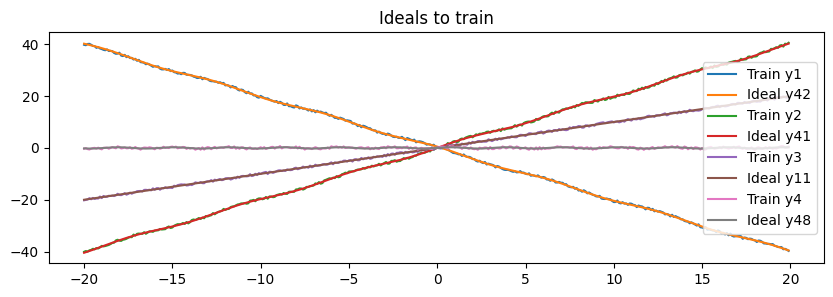

In [17]:
# plot lines 
plt.figure(figsize=(10, 3))
plt.title('Ideals to train')
for tr_col in train_columns:
    plt.plot(train_csv['x'], train_csv[tr_col], label=f'Train {tr_col}')
    plt.plot(ideal_csv['x'], ideal_csv[train_cols_to_ideals[tr_col]], label=f'Ideal {train_cols_to_ideals[tr_col]}')
legend = plt.legend(prop={'size': 10})
plt.show()

## Now lets match x,y pairs from the test dataset to estimated ideal functions

In [18]:
estimated_ideals = ideal_csv[['x'] + list(train_cols_to_ideals.values())]
estimated_ideals.head(5)

,x,y42,y41,y11,y48
0,-20.0,40.204040,-40.456474,-20.0,-0.186278
1,-19.9,40.048590,-40.233820,-19.9,-0.215690
2,-19.8,39.890660,-40.006836,-19.8,-0.236503
3,-19.7,39.729824,-39.775787,-19.7,-0.247887
4,-19.6,39.565693,-39.540980,-19.6,-0.249389


Find maximum differences of estimated ideals using a criteria given from the task description

In [19]:
renamed_ideals = estimated_ideals.rename(columns={v: k for k, v in train_cols_to_ideals.items()})
assert all(renamed_ideals.columns == train_csv.columns), "Columns do not match, probably moved or renamed incorrectly!"

diffs_df = (train_csv - renamed_ideals).rename(columns=train_cols_to_ideals)
abs_diffs_scaled = abs(diffs_df).max(axis=0) * np.sqrt(2)
max_diffs = dict(abs_diffs_scaled)
del max_diffs['x']

In [20]:
max_diffs

{'y42': 0.7014046721030611,
 'y41': 0.7038583326337785,
 'y11': 0.7056020579561832,
 'y48': 0.7067413342598947}

In [21]:
estimated_ideals

,x,y42,y41,y11,y48
0,-20.0,40.204040,-40.456474,-20.0,-0.186278
1,-19.9,40.048590,-40.233820,-19.9,-0.215690
2,-19.8,39.890660,-40.006836,-19.8,-0.236503
3,-19.7,39.729824,-39.775787,-19.7,-0.247887
4,-19.6,39.565693,-39.540980,-19.6,-0.249389
...,...,...,...,...,...
395,19.5,-38.602093,39.302770,19.5,0.240949
396,19.6,-38.834310,39.540980,19.6,0.249389
397,19.7,-39.070175,39.775787,19.7,0.247887
398,19.8,-39.309338,40.006836,19.8,0.236503


In [22]:
test_csv_sorted

,x,y
83,-20.0,-19.284970
11,-19.8,-19.915014
85,-19.3,-38.458572
3,-19.2,-37.170870
61,-19.1,-38.155376
...,...,...
79,18.2,18.535152
82,18.7,0.832272
28,18.8,37.523400
12,18.9,19.193245


In [23]:
# validate='many_to_one' is used as test.csv has duplicated entries in X column
merged_ideals_test = pd.merge(test_csv, estimated_ideals, on='x', how='left', validate='many_to_one').rename(
    columns={'y': 'test'})
assert sum(test_csv['x'].values != merged_ideals_test['x'].values) == 0, "X column values do not match!"
merged_ideals_test.sort_values(by=['x'])

,x,test,y42,y41,y11,y48
83,-20.0,-19.284970,40.204040,-40.456474,-20.0,-0.186278
11,-19.8,-19.915014,39.890660,-40.006836,-19.8,-0.236503
85,-19.3,-38.458572,39.050125,-38.817684,-19.3,-0.195970
3,-19.2,-37.170870,38.869610,-38.571660,-19.2,-0.161224
61,-19.1,-38.155376,38.684402,-38.323917,-19.1,-0.120051
...,...,...,...,...,...,...
79,18.2,18.535152,-36.001823,36.097584,18.2,-0.240830
82,18.7,0.832272,-36.905582,37.325500,18.7,-0.073668
28,18.8,37.523400,-37.100613,37.575233,18.8,-0.024737
12,18.9,19.193245,-37.300636,37.825210,18.9,0.025179


In [24]:
subset_ideals = merged_ideals_test[list(train_cols_to_ideals.values())]
subset_ideals.head(5)

,y42,y41,y11,y48
0,-34.890280,34.512188,17.5,-0.107046
1,-0.122332,0.747760,0.3,0.141161
2,17.025677,-17.731485,-8.7,0.248165
3,38.869610,-38.571660,-19.2,-0.161224
4,22.002213,-21.500006,-11.0,0.002213


In [25]:
ideals_test_abs_diff = abs(subset_ideals.sub(merged_ideals_test['test'], axis=0))
ideals_test_abs_diff.head(5)

,y42,y41,y11,y48
0,69.051320,0.351148,16.661040,34.268086
1,1.337434,0.467342,0.915102,1.073942
2,33.869585,0.887577,8.143908,17.092073
3,76.040480,1.400790,17.970870,37.009646
4,42.265267,1.236952,9.263054,20.265267


In [26]:
col_names = list(train_cols_to_ideals.values())


def find_closest(row) -> str:
    """
    Finds the closest column in a given row which must be closer 
    than maximum difference of that column estimated by a criterion from the task description.
    Args:
        row: dataframe row

    Returns:
        column name Y_n or '-' if value is more than maximum difference
    """
    min_val = float('inf')
    closest_col = None
    for col in col_names:
        gt_value = row[col]
        if gt_value < min_val:
            min_val = gt_value
            closest_col = col
    if min_val <= max_diffs[closest_col]:
        return closest_col
    return '-'


def select_value(row, col_name: str = ''):
    """
    returns Y_n's corresponding value of the closest ideal column or nan if it has not matched
    Args:
        row: dataframe row

    Returns: value or np.nan
    """
    if row[col_name] == '-':
        return np.nan
    return row[row[col_name]]

In [27]:
merged_ideals_test['No. of ideal func'] = ideals_test_abs_diff.apply(lambda row: find_closest(row), axis=1)
merged_ideals_test['closest_ideal_values'] = merged_ideals_test.apply(
    lambda row: select_value(row, col_name='No. of ideal func'), axis=1)
merged_ideals_test["Delta Y (test func)"] = abs(merged_ideals_test['test'] - merged_ideals_test['closest_ideal_values'])

In [28]:
merged_ideals_test

,x,test,y42,y41,y11,y48,No. of ideal func,closest_ideal_values,Delta Y (test func)
0,17.5,34.161040,-34.890280,34.512188,17.5,-0.107046,y41,34.512188,0.351148
1,0.3,1.215102,-0.122332,0.747760,0.3,0.141161,y41,0.747760,0.467342
2,-8.7,-16.843908,17.025677,-17.731485,-8.7,0.248165,-,NaN,NaN
3,-19.2,-37.170870,38.869610,-38.571660,-19.2,-0.161224,-,NaN,NaN
4,-11.0,-20.263054,22.002213,-21.500006,-11.0,0.002213,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,-1.9,-4.036904,3.638355,-4.273150,-1.9,0.152964,y41,-4.273150,0.236246
96,12.2,-0.010358,-23.933184,24.220886,12.2,-0.167227,y48,-0.167227,0.156869
97,16.5,-33.964134,-33.351200,32.644108,16.5,0.249978,y42,-33.351200,0.612934
98,5.3,-10.291622,-10.322813,10.183867,5.3,-0.230694,y42,-10.322813,0.031191


In [29]:
# Sort by X columns for the visualization, but for sqlite original order will be used
sorted_merged_ideals_to_test = merged_ideals_test.sort_values(by=['x'])
sorted_merged_ideals_to_test

,x,test,y42,y41,y11,y48,No. of ideal func,closest_ideal_values,Delta Y (test func)
83,-20.0,-19.284970,40.204040,-40.456474,-20.0,-0.186278,-,NaN,NaN
11,-19.8,-19.915014,39.890660,-40.006836,-19.8,-0.236503,y11,-19.800000,0.115014
85,-19.3,-38.458572,39.050125,-38.817684,-19.3,-0.195970,y41,-38.817684,0.359112
3,-19.2,-37.170870,38.869610,-38.571660,-19.2,-0.161224,-,NaN,NaN
61,-19.1,-38.155376,38.684402,-38.323917,-19.1,-0.120051,y41,-38.323917,0.168541
...,...,...,...,...,...,...,...,...,...
79,18.2,18.535152,-36.001823,36.097584,18.2,-0.240830,y11,18.200000,0.335152
82,18.7,0.832272,-36.905582,37.325500,18.7,-0.073668,-,NaN,NaN
28,18.8,37.523400,-37.100613,37.575233,18.8,-0.024737,y41,37.575233,0.051833
12,18.9,19.193245,-37.300636,37.825210,18.9,0.025179,y11,18.900000,0.293245


## Plot test set and estimated closes ideals

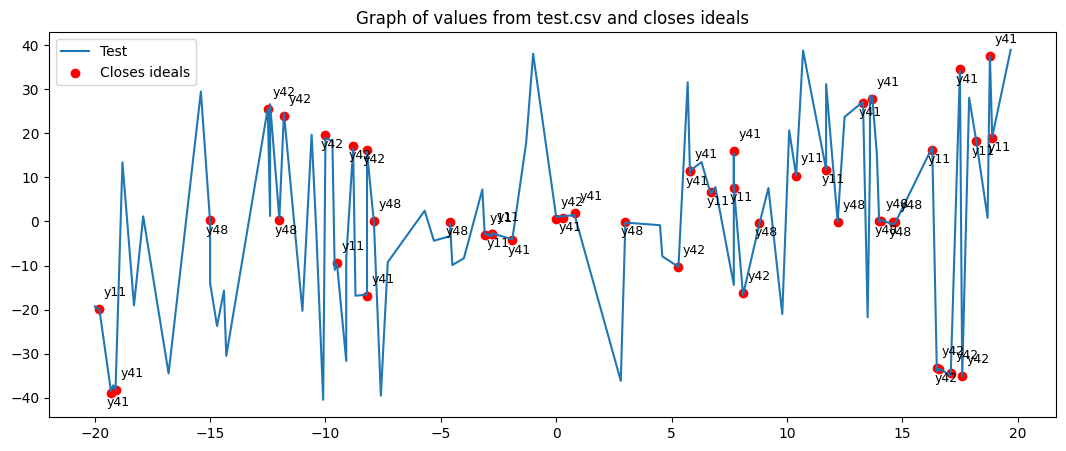

In [30]:
test_y = sorted_merged_ideals_to_test['test'].values
x_values = sorted_merged_ideals_to_test['x'].values

plt.figure(figsize=(13, 5))
plt.title('Graph of values from test.csv and closes ideals')
plt.plot(x_values, test_y, label='Test')

# drop nans and annotate scatter plot
without_nans = sorted_merged_ideals_to_test.dropna()
closes_ideals_names = without_nans['No. of ideal func'].values
closes_ideals_values = without_nans['closest_ideal_values'].values
x_values = without_nans['x'].values

plt.scatter(x_values, closes_ideals_values, label='Closes ideals', color='red')
# annotate ideals with column names
for i, (txt, x, y) in enumerate(zip(closes_ideals_names, x_values, closes_ideals_values)):
    y = y + 3 if i % 2 == 0 else y - 3
    x = x + 0.2 if i % 2 == 0 else x - 0.2
    plt.annotate(txt, (x, y), size=9)

plt.legend()
plt.show()

## Now save the tables into a sqlite db

In [31]:
def to_sql(dataframe: pd.DataFrame, file_path, suffix, **kwargs) -> pd.DataFrame:
    """
    Saves dataframes as a SQLite database
    Args:
        dataframe: DataFrame
        file_path: where to save
        suffix: what name to add as suffix

    Returns:
        saved dataframe
    """
    os.makedirs('/'.join(file_path.split('/')[:-1]), exist_ok=True)
    engine = create_engine(f'sqlite:///{file_path}.db', echo=False)
    cp_dataframe = dataframe.copy()
    cp_dataframe.columns = [name.capitalize() + suffix for name in cp_dataframe.columns]
    cp_dataframe.set_index(cp_dataframe.columns[0], inplace=True)
    cp_dataframe.to_sql(
        file_path,
        engine,
        if_exists="replace",
        index=True,
        **kwargs
    )
    return cp_dataframe

In [32]:
to_sql(train_csv, file_path="database/training", suffix=" (training func)")

,Y1 (training func),Y2 (training func),Y3 (training func),Y4 (training func)
X (training func),,,,
-20.0,39.778572,-40.078590,-20.214268,-0.324914
-19.9,39.604813,-39.784000,-20.070950,-0.058820
-19.8,40.099070,-40.018845,-19.906782,-0.451830
-19.7,40.151100,-39.518402,-19.389118,-0.612044
-19.6,39.795662,-39.360065,-19.815890,-0.306076
...,...,...,...,...
19.5,-38.254158,39.661987,19.536741,0.695158
19.6,-39.106945,39.067880,19.840752,0.638423
19.7,-38.926495,40.211475,19.516634,0.109105


In [33]:
to_sql(ideal_csv, file_path="database/ideal", suffix=" (ideal func)")

,Y1 (ideal func),Y2 (ideal func),Y3 (ideal func),Y4 (ideal func),Y5 (ideal func),Y6 (ideal func),Y7 (ideal func),Y8 (ideal func),Y9 (ideal func),Y10 (ideal func),...,Y41 (ideal func),Y42 (ideal func),Y43 (ideal func),Y44 (ideal func),Y45 (ideal func),Y46 (ideal func),Y47 (ideal func),Y48 (ideal func),Y49 (ideal func),Y50 (ideal func)
X (ideal func),,,,,,,,,,,,,,,,,,,,,
-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,18.258905,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,17.266117,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,16.110740,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,14.805996,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,13.366487,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.5,0.605540,0.795815,10.605540,5.795815,-10.605540,-0.605540,-0.947580,-0.117020,1.591630,11.808027,...,39.302770,-38.602093,2.970414,-0.012422,12.970414,5.273000,-5.273000,0.240949,0.605540,0.714434
19.6,0.681964,0.731386,10.681964,5.731386,-10.681964,-0.681964,-0.930426,0.774356,1.462772,13.366487,...,39.540980,-38.834310,2.975530,-0.012438,12.975530,5.278115,-5.278115,0.249389,0.681964,0.667902
19.7,0.751573,0.659649,10.751574,5.659649,-10.751574,-0.751573,-0.910947,-0.994669,1.319299,14.805996,...,39.775787,-39.070175,2.980619,-0.012453,12.980619,5.283204,-5.283204,0.247887,0.751573,0.612840


In [34]:
test_mapping_df = merged_ideals_test[['x', 'test', 'Delta Y (test func)', 'No. of ideal func']].rename(
    columns={'x': 'X (test func)', 'test': 'Y (test func)'})
test_mapping_df.head(10)

,X (test func),Y (test func),Delta Y (test func),No. of ideal func
0,17.5,34.161040,0.351148,y41
1,0.3,1.215102,0.467342,y41
2,-8.7,-16.843908,NaN,-
3,-19.2,-37.170870,NaN,-
4,-11.0,-20.263054,NaN,-
5,0.8,1.426456,0.532222,y41
6,14.0,-0.066506,0.134233,y48
7,-10.4,-2.007094,NaN,-
8,-15.0,-0.205363,0.452371,y48
9,5.8,10.711373,0.656326,y41


In [36]:
to_sql(test_mapping_df, file_path="database/mapping", suffix="", chunksize=1)  # chunksize=1 writes line by line


,Y (test func),Delta y (test func),No. of ideal func
X (test func),,,
17.5,34.161040,0.351148,y41
0.3,1.215102,0.467342,y41
-8.7,-16.843908,NaN,-
-19.2,-37.170870,NaN,-
-11.0,-20.263054,NaN,-
...,...,...,...
-1.9,-4.036904,0.236246,y41
12.2,-0.010358,0.156869,y48
16.5,-33.964134,0.612934,y42
